# Customer Segmentation using Agglomerative Clustering

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

In [3]:
df = df.loc[:10, ['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [4]:
# Normalize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.221660,-0.947359
1,1.082220,0.329641
2,-0.925755,-0.348273
3,-1.499462,-0.947359
4,1.082220,2.741751


### Modeling

In [5]:
model  =  AgglomerativeClustering(n_clusters=4)
model.fit(df)
labels = model.labels_
print(labels)

[1 0 1 3 2 0 1 0 3 0 0]


### Insights
We assign the labels to each row in dataframe.

In [6]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.221660,-0.947359,1
1,1.082220,0.329641,0
2,-0.925755,-0.348273,1
3,-1.499462,-0.947359,3
4,1.082220,2.741751,2


Now, lets look at the distribution of customers based on their age and income:

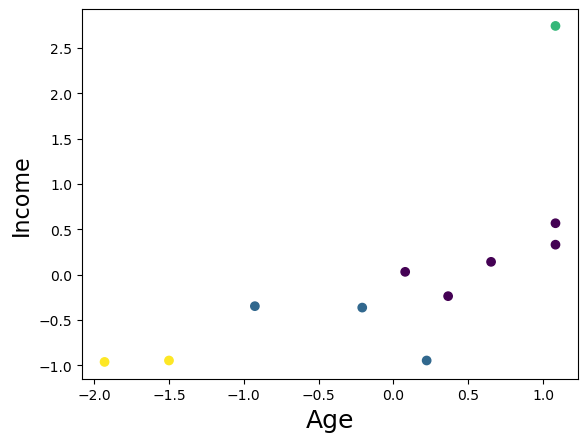

In [12]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

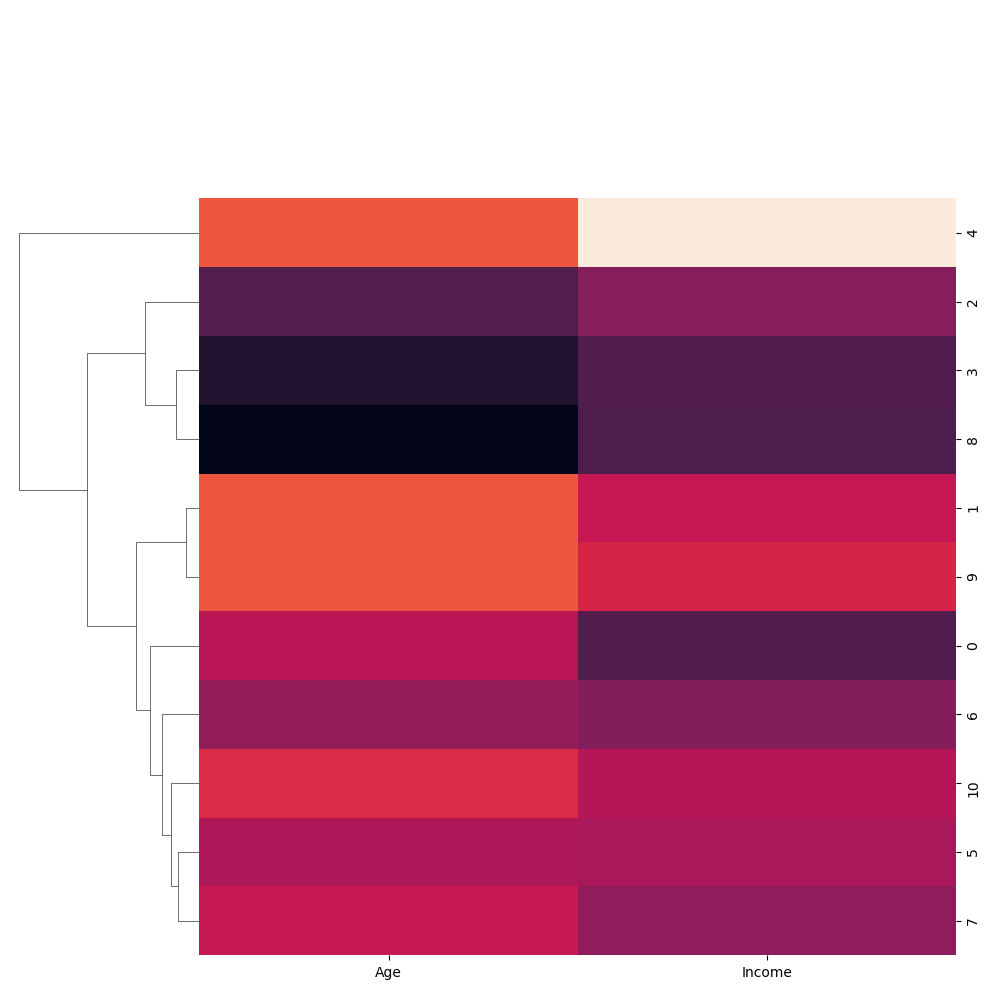

In [8]:
sns.clustermap(df[['Age','Income']], cbar_pos=None,  col_cluster=False)

## Dendrogram using scipy

In [9]:
from scipy.cluster.hierarchy import dendrogram, ward

In [10]:
linkage_array = ward(df)

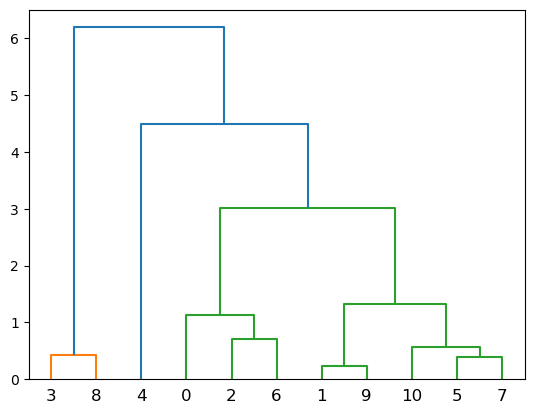

In [14]:
d = dendrogram(linkage_array)
#plt.gca().figure.set_size_inches(15,10)
#x = plt.xticks(rotation='vertical')